In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
pd.options.display.max_rows = 999

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [4]:
df.PoolQC.isna().sum()

1453

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


#### DROP Variables with lot of NAN

In [6]:
df = df[[c for c in df if df[c].isnull().sum() < 250]]

#### EXPLORATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029758C681C8>]],
      dtype=object)

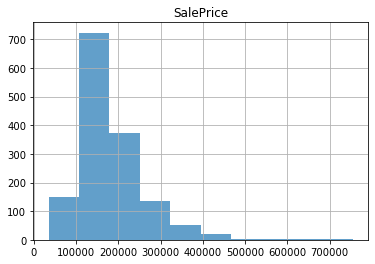

In [7]:
#Explore the Y Variable
df["SalePrice"].value_counts()
df.hist(column='SalePrice', bins = 10, alpha = 0.7)

In [8]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002975ECB1948>]],
      dtype=object)

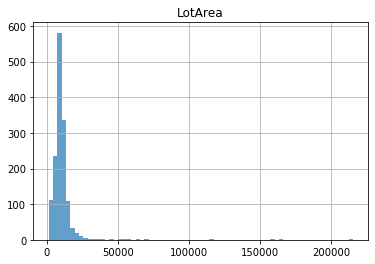

In [9]:
df.hist(column='LotArea', bins = 70 , alpha = 0.7)

In [10]:
df.LotArea.describe()
#There are some extremely big properties - Throw them out?

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [11]:
df.LotArea[df["LotArea"]>50000].count

# Yes there are only 11 houses with more than 50.000 qm so throw them out 

<bound method Series.count of 53       50271
249     159000
313     215245
335     164660
384      53107
451      70761
457      53227
706     115149
769      53504
1298     63887
1396     57200
Name: LotArea, dtype: int64>

In [12]:
df = df[df['LotArea'] <= 50000]  

In [13]:
df.LotArea.describe()

count     1449.000000
mean      9867.879917
std       4578.300353
min       1300.000000
25%       7500.000000
50%       9450.000000
75%      11500.000000
max      46589.000000
Name: LotArea, dtype: float64

[Text(0, 0, 'CollgCr'),
 Text(0, 0, 'Veenker'),
 Text(0, 0, 'Crawfor'),
 Text(0, 0, 'NoRidge'),
 Text(0, 0, 'Mitchel'),
 Text(0, 0, 'Somerst'),
 Text(0, 0, 'NWAmes'),
 Text(0, 0, 'OldTown'),
 Text(0, 0, 'BrkSide'),
 Text(0, 0, 'Sawyer'),
 Text(0, 0, 'NridgHt'),
 Text(0, 0, 'NAmes'),
 Text(0, 0, 'SawyerW'),
 Text(0, 0, 'IDOTRR'),
 Text(0, 0, 'MeadowV'),
 Text(0, 0, 'Edwards'),
 Text(0, 0, 'Timber'),
 Text(0, 0, 'Gilbert'),
 Text(0, 0, 'StoneBr'),
 Text(0, 0, 'ClearCr'),
 Text(0, 0, 'NPkVill'),
 Text(0, 0, 'Blmngtn'),
 Text(0, 0, 'BrDale'),
 Text(0, 0, 'SWISU'),
 Text(0, 0, 'Blueste')]

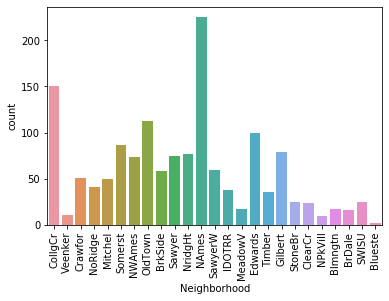

In [14]:
chart_neighborhood = sns.countplot(df['Neighborhood'])
chart_neighborhood.set_xticklabels(chart_neighborhood.get_xticklabels(), rotation=90)

In [15]:
df.YearBuilt.describe()

count    1449.000000
mean     1971.242926
std        30.271932
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [16]:
df.YearRemodAdd.describe()

# I guess the Year of remodeling is more important for analysis than the year it was first built

count    1449.000000
mean     1984.856453
std        20.659502
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [17]:
df.YearRemodAdd.isna().sum()

0

In [18]:
df.BedroomAbvGr.describe()
#drop rooms with 0 bedrooms

count    1449.000000
mean        2.868185
std         0.813314
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64

In [19]:
df = df[df["BedroomAbvGr"]>0]

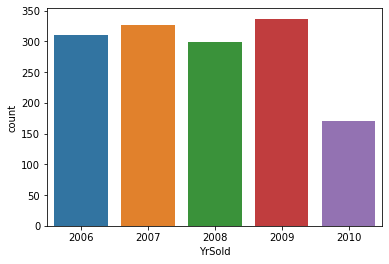

In [20]:
sns.countplot(df['YrSold'])

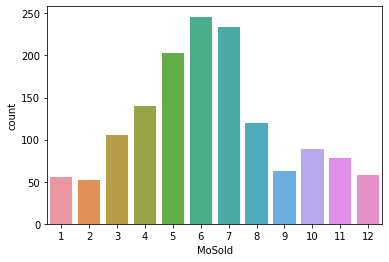

In [21]:
sns.countplot(df['MoSold'])

#### To Do: 
- Create Dummy Variabbles for Seasons based On MonthSold -- It seems more houses are sold in Summer

#### Analyzing Relationships Between Numerical Variables

In [22]:
df[df['YrSold'] == 2010].groupby('MoSold')['YrSold'].count()
# In 2010 data was only collected until July - so we have to exclude 2010

MoSold
1    10
2    15
3    21
4    38
5    48
6    33
7     6
Name: YrSold, dtype: int64

In [23]:
df = df[df['YrSold'] < 2010]  

In [24]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [25]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


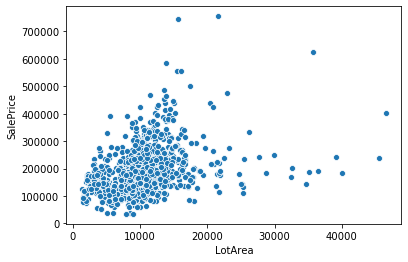

In [26]:
sns.scatterplot(x=df['LotArea'], y=df['SalePrice'])

### Create new Variable = PricePerArea

In [27]:
df = df.assign(PricePerArea=df["SalePrice"]/df["LotArea"])

In [28]:
df.PricePerArea.describe()

count    1273.000000
mean       21.247329
std        12.346178
min         3.923444
25%        14.000000
50%        17.932489
75%        24.000000
max        95.384615
Name: PricePerArea, dtype: float64

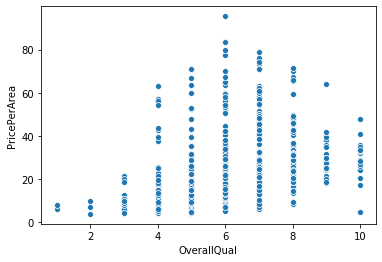

In [29]:
sns.scatterplot(x=df['OverallQual'], y=df['PricePerArea'])

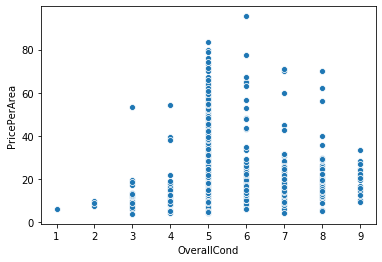

In [30]:
sns.scatterplot(x=df['OverallCond'], y=df['PricePerArea'])

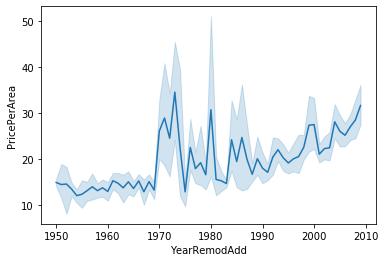

In [31]:
sns.lineplot(x=df["YearRemodAdd"], y=df['PricePerArea'])

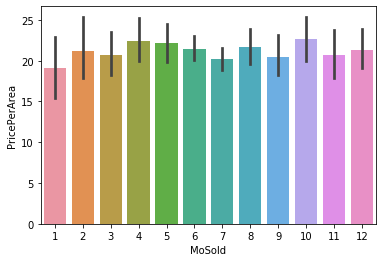

In [32]:
sns.barplot(x=df['MoSold'], y=df['PricePerArea'])

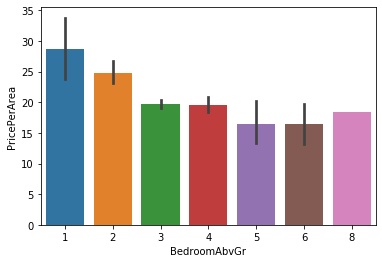

In [33]:
sns.barplot(x=df["BedroomAbvGr"], y=df['PricePerArea'])

#### Regression

In [109]:
df_reg = df[["SalePrice", "PricePerArea", "YearRemodAdd", "OverallCond", "OverallQual","YrSold", "YearBuilt", "Neighborhood"]]

In [110]:
import statsmodels.api as sm

df_reg = sm.add_constant(df_reg)
df_reg = sm.OLS(endog=df_reg["PricePerArea"], exog=df_reg[["const", "OverallCond", "OverallQual", "YearRemodAdd", "YearBuilt", "YrSold"]]).fit()


In [111]:
df_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PricePerArea   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     62.84
Date:                Sun, 09 Feb 2020   Prob (F-statistic):           1.22e-58
Time:                        17:47:29   Log-Likelihood:                -4864.3
No. Observations:                1273   AIC:                             9741.
Df Residuals:                    1267   BIC:                             9772.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -686.1263    554.480     -1.237      0.216   -1773.926     401.674
OverallCond      0.4499      0.327      1.377      0.169      -0.191       1.091
OverallQual      1.7826      0.287      6.210      0.000       1.219       2.346
YearRemodAdd     0.0566      0.021      2.682      0.007       0.015       0.098
YearBuilt        0.0954      0.016      6.151      0.000       0.065       0.126
YrSold           0.1961      0.277      0.709      0.479      -0.347       0.739
==============================================================================
Omnibus:                      691.437   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4670.576
Skew:                           2.502   Prob(JB):                         0.00
Kurtosis:                      10.938   Cond. No.                     6.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Insights 

- the later the house was remodeled the higher the Price per LotArea
- the newer the house, the pricier
- the later sold, the higher the price
- with every increase in Overall Quality the price increases on average by 2.33 Euro
- very weired: Overall Condition has a negative effect on price - but its also not
significant
- Overall Quality has the strongest Effect

#### Inspect Neighborhood as Explanator for Price Per Area 
- Use dummy coding for categorical 


Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [76]:
from statsmodels.formula.api import ols

from patsy.contrasts import Treatment
#levels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
#contrast = Treatment(reference=0).code_without_intercept(levels)
#print(contrast.matrix)

#collgr Neighborhood is reference category

mod = ols('PricePerArea ~ C(Neighborhood, Treatment) + YearRemodAdd + OverallQual', data=df).fit()
mod.summary()

#Neighborhood seems to be a good indicator for prediction of price per Area- Positive Effects on Price for Blueste and BrDale
#in contrast to Collgr 
# wenn adding neighborhood categories, the value for Quality on price gets bigger, Year Remodeled gets smaller

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PricePerArea   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     74.93
Date:                Sun, 09 Feb 2020   Prob (F-statistic):          4.32e-233
Time:                        17:24:56   Log-Likelihood:                -4406.1
No. Observations:                1273   AIC:                             8866.
Df Residuals:                    1246   BIC:                             9005.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              -130.4735     28.410     -4.592      0.000    -186.211     -74.736
C(Neighborhood, Treatment)[T.Blueste]    32.9734      5.856      5.630      0.000      21.484      44.463
C(Neighborhood, Treatment)[T.BrDale]      6.3515      2.843      2.234      0.026       0.774      11.929
C(Neighborhood, Treatment)[T.BrkSide]   -33.3638      2.293    -14.549      0.000     -37.863     -28.865
C(Neighborhood, Treatment)[T.ClearCr]   -37.1082      2.674    -13.879      0.000     -42.354     -31.863
C(Neighborhood, Treatment)[T.CollgCr]   -34.7913      2.063    -16.868      0.000     -38.838     -30.745
C(Neighborhood, Treatment)[T.Crawfor]   -32.6413      2.284    -14.290      0.000     -37.123     -28.160
C(Neighborhood, Treatment)[T.Edwards]   -35.4281      2.191    -16.173      0.000     -39.726     -31.130
C(Neighborhood, Treatment)[T.Gilbert]   -37.5636      2.155    -17.429      0.000     -41.792     -33.335
C(Neighborhood, Treatment)[T.IDOTRR]    -36.9119      2.492    -14.809      0.000     -41.802     -32.022
C(Neighborhood, Treatment)[T.MeadowV]    -4.7108      2.922     -1.612      0.107     -10.444       1.022
C(Neighborhood, Treatment)[T.Mitchel]   -36.6519      2.302    -15.919      0.000     -41.169     -32.135
C(Neighborhood, Treatment)[T.NAmes]     -36.5494      2.102    -17.386      0.000     -40.674     -32.425
C(Neighborhood, Treatment)[T.NPkVill]    -3.0072      3.557     -0.845      0.398      -9.986       3.972
C(Neighborhood, Treatment)[T.NWAmes]    -37.6507      2.199    -17.119      0.000     -41.966     -33.336
C(Neighborhood, Treatment)[T.NoRidge]   -31.6717      2.377    -13.323      0.000     -36.336     -27.008
C(Neighborhood, Treatment)[T.NridgHt]   -28.5637      2.179    -13.106      0.000     -32.840     -24.288
C(Neighborhood, Treatment)[T.OldTown]   -35.0353      2.157    -16.240      0.000     -39.268     -30.803
C(Neighborhood, Treatment)[T.SWISU]     -33.3058      2.619    -12.717      0.000     -38.444     -28.168
C(Neighborhood, Treatment)[T.Sawyer]    -37.6003      2.277    -16.516      0.000     -42.067     -33.134
C(Neighborhood, Treatment)[T.SawyerW]   -35.8937      2.276    -15.773      0.000     -40.358     -31.429
C(Neighborhood, Treatment)[T.Somerst]   -23.1520      2.139    -10.823      0.000     -27.349     -18.955
C(Neighborhood, Treatment)[T.StoneBr]   -22.6340      2.659     -8.511      0.000     -27.851     -17.417
C(Neighborhood, Treatment)[T.Timber]    -37.0000      2.404    -15.393      0.000     -41.716     -32.284
C(Neighborhood, Treatment)[T.Veenker]   -35.9876      3.149    -11.427      0.000     -42.166     -29.809
YearRemodAdd                              0.0881      0.014      6.147      0.000       0.060       0.116
OverallQu

[Text(0, 0, 'CollgCr'),
 Text(0, 0, 'Veenker'),
 Text(0, 0, 'Crawfor'),
 Text(0, 0, 'NoRidge'),
 Text(0, 0, 'Mitchel'),
 Text(0, 0, 'Somerst'),
 Text(0, 0, 'NWAmes'),
 Text(0, 0, 'OldTown'),
 Text(0, 0, 'BrkSide'),
 Text(0, 0, 'Sawyer'),
 Text(0, 0, 'NridgHt'),
 Text(0, 0, 'NAmes'),
 Text(0, 0, 'SawyerW'),
 Text(0, 0, 'IDOTRR'),
 Text(0, 0, 'MeadowV'),
 Text(0, 0, 'Edwards'),
 Text(0, 0, 'Timber'),
 Text(0, 0, 'Gilbert'),
 Text(0, 0, 'StoneBr'),
 Text(0, 0, 'ClearCr'),
 Text(0, 0, 'NPkVill'),
 Text(0, 0, 'Blmngtn'),
 Text(0, 0, 'BrDale'),
 Text(0, 0, 'SWISU'),
 Text(0, 0, 'Blueste')]

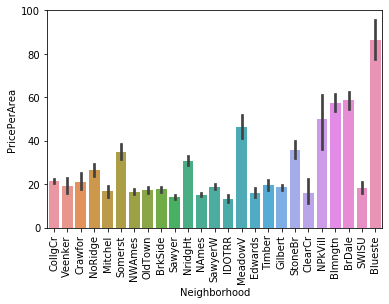

In [40]:
n = sns.barplot(x="Neighborhood", y="PricePerArea", data=df)
n.set_xticklabels(n.get_xticklabels(), rotation=90)

###### Function is a categorial Variable that can be put in order - I change the categories to ranks

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297627E6588>]],
      dtype=object)

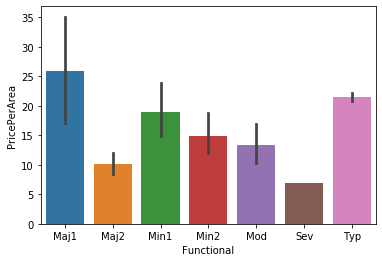

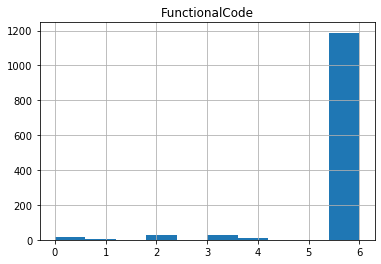

In [41]:
df.Functional.unique()
df.Functional = pd.Categorical(df.Functional)
df['FunctionalCode'] = df.Functional.cat.codes

sns.barplot(x="Functional", y="PricePerArea", data=df)
df.hist(column="FunctionalCode")

##### Roof Material

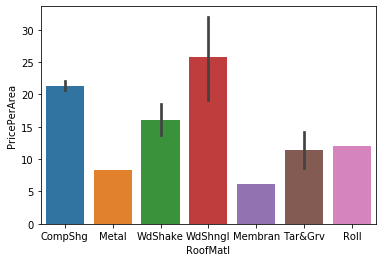

In [42]:
sns.barplot(x="RoofMatl", y="PricePerArea", data=df)

### Condition1: Proximity to various conditions

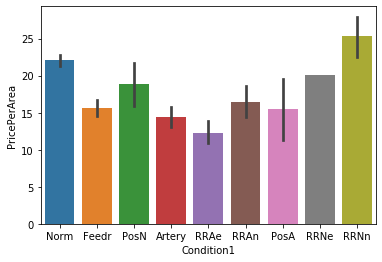

In [43]:
sns.barplot(x="Condition1", y="PricePerArea", data=df)

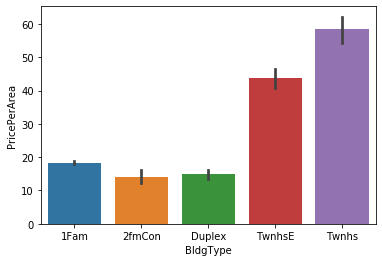

In [44]:
#### Type of Building

sns.barplot(x="BldgType", y="PricePerArea", data=df)

[Text(0, 0, 'VinylSd'),
 Text(0, 0, 'MetalSd'),
 Text(0, 0, 'Wd Sdng'),
 Text(0, 0, 'HdBoard'),
 Text(0, 0, 'BrkFace'),
 Text(0, 0, 'WdShing'),
 Text(0, 0, 'CemntBd'),
 Text(0, 0, 'AsbShng'),
 Text(0, 0, 'Plywood'),
 Text(0, 0, 'Stucco'),
 Text(0, 0, 'BrkComm'),
 Text(0, 0, 'Stone'),
 Text(0, 0, 'ImStucc'),
 Text(0, 0, 'CBlock')]

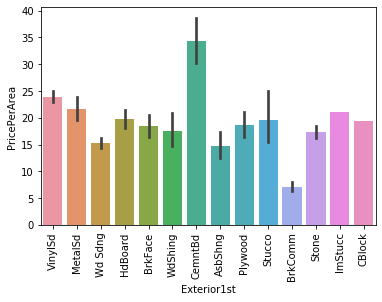

In [45]:
e = sns.barplot(x="Exterior1st", y="PricePerArea", data=df)
e.set_xticklabels(e.get_xticklabels(), rotation=90)

CONDITION VARIABLES as Explanator

In [46]:
#building_levels = [1,2,3,4,5]
#contrast = Treatment(reference=0).code_without_intercept(building_levels)

#condition1_levels = [1,2,3,4,5,6,7,8,9]
#contrast = Treatment(reference=0).code_without_intercept(condition1_levels)


In [72]:

mod3 = ols('PricePerArea ~ C(BldgType) + C(Condition1) + C(Neighborhood) + FunctionalCode + OverallQual + YearRemodAdd', data=df).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PricePerArea   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     104.9
Date:                Sun, 09 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:31:50   Log-Likelihood:                -4074.4
No. Observations:                1273   AIC:                             8229.
Df Residuals:                    1233   BIC:                             8435.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -97.0297     22.218     -4.367      0.000    -140.619     -53.440
C(BldgType)[T.2fmCon]         -1.9213      1.266     -1.518      0.129      -4.405       0.562
C(BldgType)[T.Duplex]          1.1459      0.968      1.183      0.237      -0.754       3.046
C(BldgType)[T.Twnhs]          31.5880      1.291     24.462      0.000      29.055      34.121
C(BldgType)[T.TwnhsE]         16.9004      0.798     21.173      0.000      15.334      18.466
C(Condition1)[T.Feedr]         1.7373      1.233      1.409      0.159      -0.681       4.156
C(Condition1)[T.Norm]          2.0357      1.003      2.029      0.043       0.067       4.004
C(Condition1)[T.PosA]         -0.4026      2.945     -0.137      0.891      -6.181       5.375
C(Condition1)[T.PosN]          2.0504      1.791      1.145      0.253      -1.463       5.564
C(Condition1)[T.RRAe]         -1.2205      2.432     -0.502      0.616      -5.992       3.551
C(Condition1)[T.RRAn]         -1.6379      1.622     -1.010      0.313      -4.820       1.545
C(Condition1)[T.RRNe]          5.0006      6.191      0.808      0.419      -7.145      17.146
C(Condition1)[T.RRNn]          1.6024      3.215      0.498      0.618      -4.704       7.909
C(Neighborhood)[T.Blueste]    24.2983      4.582      5.303      0.000      15.310      33.287
C(Neighborhood)[T.BrDale]     -5.7079      2.397     -2.381      0.017     -10.411      -1.005
C(Neighborhood)[T.BrkSide]   -17.0896      1.936     -8.828      0.000     -20.887     -13.292
C(Neighborhood)[T.ClearCr]   -21.1341      2.212     -9.556      0.000     -25.473     -16.795
C(Neighborhood)[T.CollgCr]   -20.0473      1.743    -11.503      0.000     -23.466     -16.628
C(Neighborhood)[T.Crawfor]   -18.2163      1.900     -9.588      0.000     -21.944     -14.489
C(Neighborhood)[T.Edwards]   -21.2541      1.840    -11.553      0.000     -24.863     -17.645
C(Neighborhood)[T.Gilbert]   -21.2423      1.833    -11.587      0.000     -24.839     -17.646
C(Neighborhood)[T.IDOTRR]    -20.9685      2.070    -10.129      0.000     -25.030     -16.907
C(Neighborhood)[T.MeadowV]   -12.8132      2.353     -5.446      0.000     -17.429      -8.198
C(Neighborhood)[T.Mitchel]   -22.6216      1.914    -11.818      0.000     -26.377     -18.866
C(Neighborhood)[T.NAmes]     -21.0167      1.788    -11.756      0.000     -24.524     -17.509
C(Neighborhood)[T.NPkVill]    -8.6407      2.780     -3.108      0.002     -14.095      -3.187
C(Neighborhood)[T.NWAmes]    -21.6795      1.874    -11.568      0.000     -25.356     -18.003
C(Neighborhood)[T.NoRidge]   -16.4092      1.982     -8.279      0.000     -20.297     -12.521
C(Neighborhood)[T.NridgHt]   -19.0971      1.780    -10.726      0.000     -22.590     -15.604
C(Neighborhood)[T.OldTown]   -18.6803      

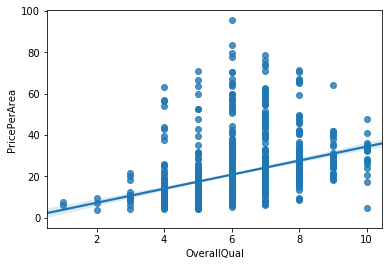

In [85]:
sns.regplot(x="OverallQual", y="PricePerArea", data=df);

C:\Users\Val\Miniconda3\envs\test5\lib\site-packages\ipykernel_launcher.py:9: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



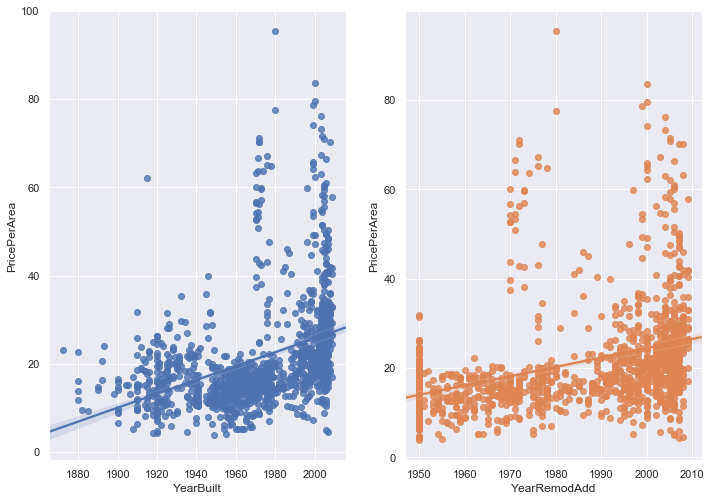

In [102]:
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax =plt.subplots(1,2)

sns.regplot(x="YearBuilt", y="PricePerArea", data=df, ax=ax[0])
sns.regplot(x="YearRemodAdd", y="PricePerArea", data=df, ax=ax[1])

fig.show()